## **Libraries imported**

In [9]:
from os import listdir
import pandas as pd
import csv
import random

## Converting PSV to CSV

In [5]:
a_traincsv = listdir('training/')
b_traincsv = listdir('training_setB/')



with open('train_patient.csv', 'w') as csvoutput:
  writer = csv.writer(csvoutput, lineterminator='\n')


  for ind, csv_name in enumerate(a_traincsv):
    with open('training/'+ csv_name,'r') as csvinput:

    
      reader = csv.reader(csvinput, delimiter='|')
      all = []
      
      if ind ==0 :
        row = next(reader)
        row.append('Patient_id')
        row.append('time')
        all.append(row)
      else:
        row = next(reader)

      for i,row in enumerate(reader):
        row.append(ind)
        row.append(i)
        
        
        all.append(row)

      writer.writerows(all)
 

  num = ind 


  for inde, csv_name in enumerate(b_traincsv):
    if inde < 10000:
      num = num+1
      with open('training_setB/'+ csv_name,'r') as csvinput:


        reader = csv.reader(csvinput, delimiter='|')
        all = []


        row = next(reader)
        for i,row in enumerate(reader):
          row.append(num)
          row.append(i)


          all.append(row)

        writer.writerows(all)


In [7]:
with open('val_patient.csv', 'w') as csvoutput:
  writer = csv.writer(csvoutput, lineterminator='\n')

  for inde, csv_name in enumerate(b_traincsv):
    
    if inde >=10000 and inde <15000:
      with open('training_setB/'+ csv_name,'r') as csvinput:


        reader = csv.reader(csvinput, delimiter='|')
        all = []

        
        if inde ==10000 :
          row = next(reader)
          row.append('Patient_id')
          row.append('time')
          all.append(row)
        else:
          row = next(reader)

        for i,row in enumerate(reader):
          row.append(inde)
          row.append(i)


          all.append(row)

        writer.writerows(all)

In [8]:
with open('test_patient.csv', 'w') as csvoutput:
  writer = csv.writer(csvoutput, lineterminator='\n')

  for inde, csv_name in enumerate(b_traincsv):
    
    if inde >=15000:
      with open('training_setB/'+ csv_name,'r') as csvinput:


        reader = csv.reader(csvinput, delimiter='|')
        all = []

        
        if inde ==15000 :
          row = next(reader)
          row.append('Patient_id')
          row.append('time')
          all.append(row)
        else:
          row = next(reader)

        for i,row in enumerate(reader):
          row.append(inde)
          row.append(i)


          all.append(row)

        writer.writerows(all)

## ML Libraries

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

## Read Data From CSV

In [3]:
train = pd.read_csv('./train_patient.csv')
train.shape

(1168632, 43)

In [4]:
train.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_id', 'time'],
      dtype='object')

## Data Pre-Processing

In [5]:
train['SepsisLabel'].value_counts()

0    1146295
1      22337
Name: SepsisLabel, dtype: int64

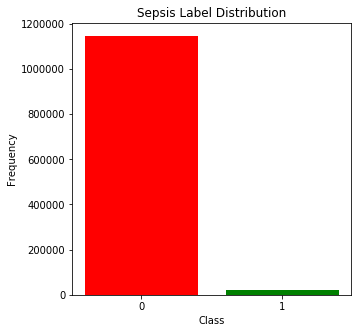

In [8]:
rcParams['figure.figsize'] = 5, 5

plt.bar(train['SepsisLabel'].value_counts().index,
        train['SepsisLabel'].value_counts(),color=["red","green"])
plt.xticks([0,1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')

## Null Value Identification

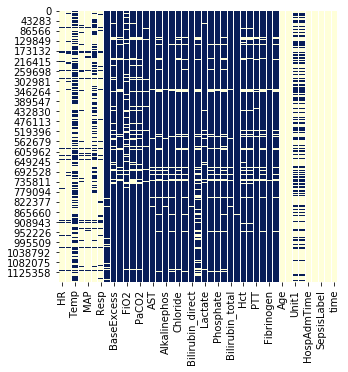

In [7]:
sns.heatmap(train.isnull(), cmap="YlGnBu",cbar=False)

In [14]:
missing = (train.isnull().sum() / train.shape[0]) * 100
print(missing)
print(len(missing))

HR                   9.140431
O2Sat               12.688083
Temp                66.221360
SBP                 14.793023
MAP                 11.692988
DBP                 37.056404
Resp                13.455048
EtCO2               97.651870
BaseExcess          92.880393
HCO3                94.499124
FiO2                89.676305
pH                  91.532578
PaCO2               93.356420
SaO2                96.050853
AST                 98.420375
BUN                 92.688117
Alkalinephos        98.442709
Calcium             94.421512
Chloride            94.167454
Creatinine          93.712477
Bilirubin_direct    99.823554
Glucose             84.566313
Lactate             97.077951
Magnesium           93.191270
Phosphate           95.637720
Potassium           90.161659
Bilirubin_total     98.598960
TroponinI           99.322712
Hct                 90.152674
Hgb                 92.120188
PTT                 96.403915
WBC                 93.214374
Fibrinogen          99.300379
Platelets 

Text(0.5, 1.0, 'Percentage of missing data in each feature')

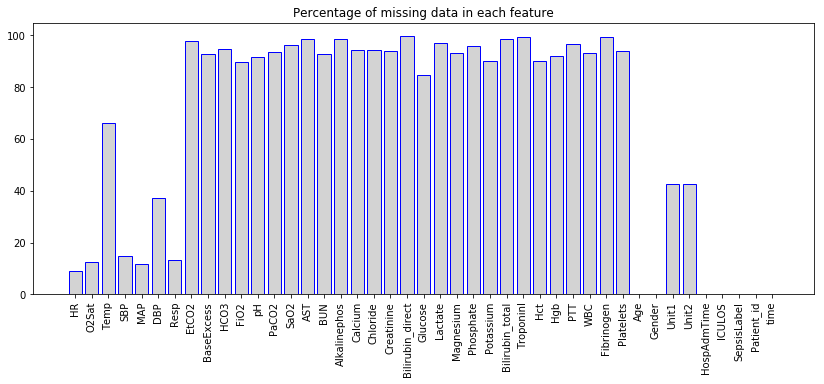

In [31]:
rcParams['figure.figsize'] = 14, 5
_ = plt.bar(missing.index, missing,color='lightgrey',edgecolor="blue")
_ = plt.xticks(missing.index, rotation=90)

plt.title("Percentage of missing data in each feature")

### Columns With Less Than 90% missing Data

In [18]:
selected_cols = list(missing[missing < 90].index)
selected_cols

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'FiO2',
 'Glucose',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel',
 'Patient_id',
 'time']

In [19]:
filter_train = train[selected_cols]
filter_train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,0,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,0,1
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,0,2
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,0,3
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,0.28,NaN,83.14,0,NaN,NaN,-0.03,5,0,0,4


### Marking Categorical Columns

In [20]:
categorical = filter_train.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [21]:
cat_vars = list(categorical[categorical].index)
cont_vars = list(categorical[~categorical].index)
cont_vars.pop(-3)

'SepsisLabel'

## Data Visualisation

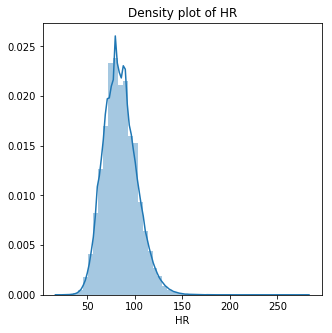

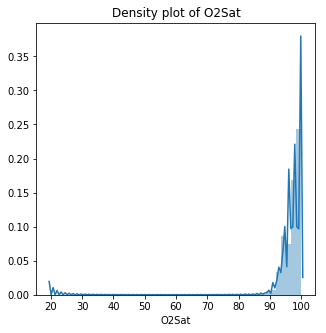

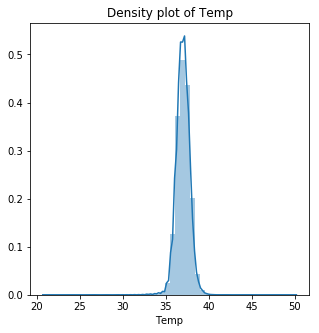

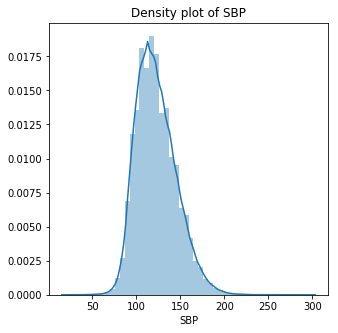

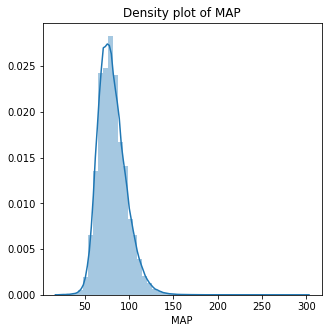

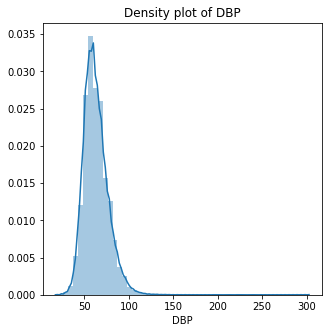

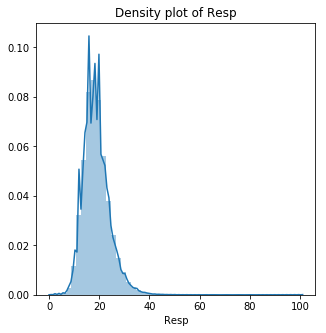

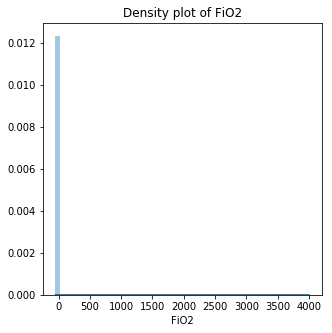

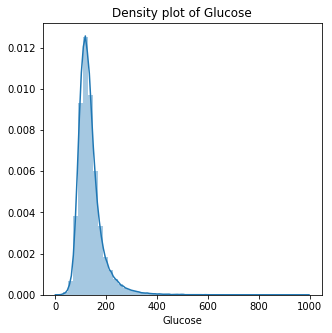

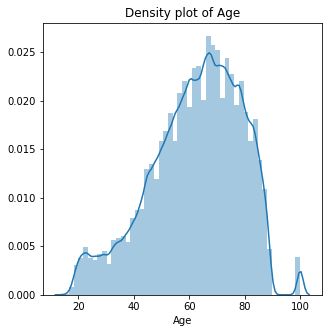

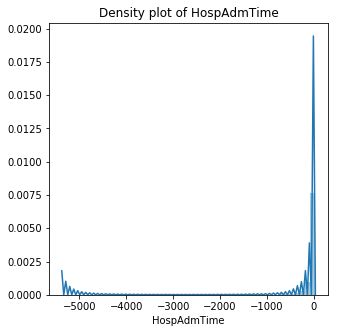

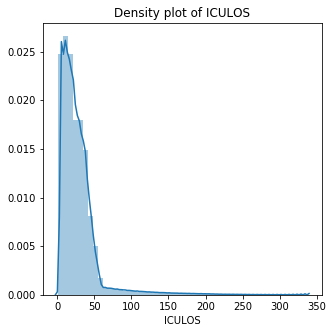

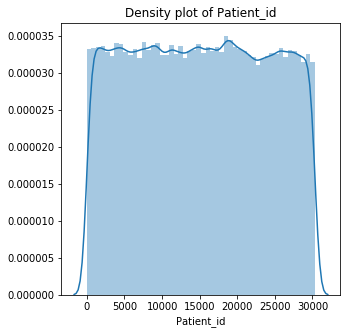

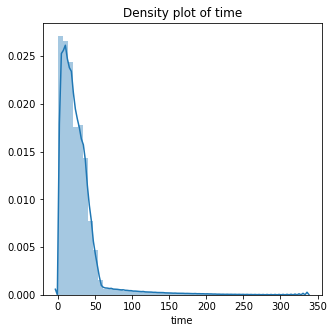

In [22]:
rcParams['figure.figsize'] = 5, 5
for i,var in enumerate(cont_vars):
    plt.figure(i)
    plt.title("Density plot of " + str(var))
    sns.distplot(filter_train[var].dropna(), axlabel=var);

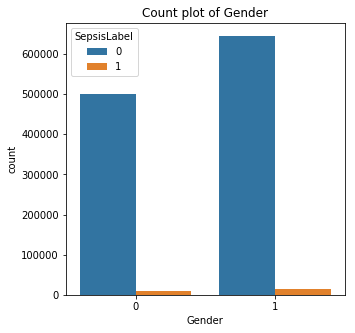

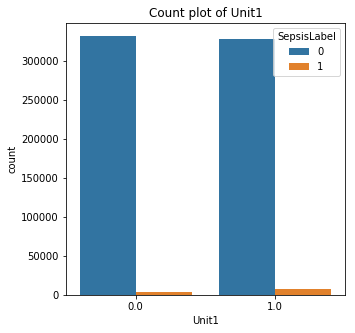

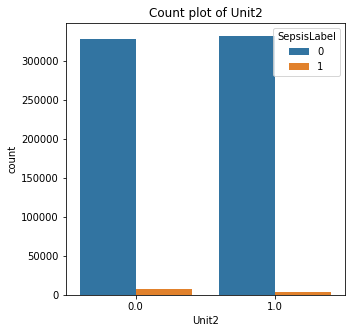

In [23]:
for i,var in enumerate(cat_vars):
    plt.figure(i)
    plt.title("Count plot of " + str(var))
    sns.countplot(filter_train[var].dropna(), hue='SepsisLabel', data= filter_train);

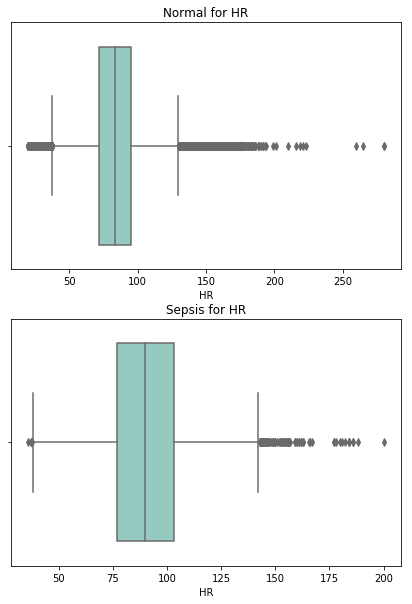

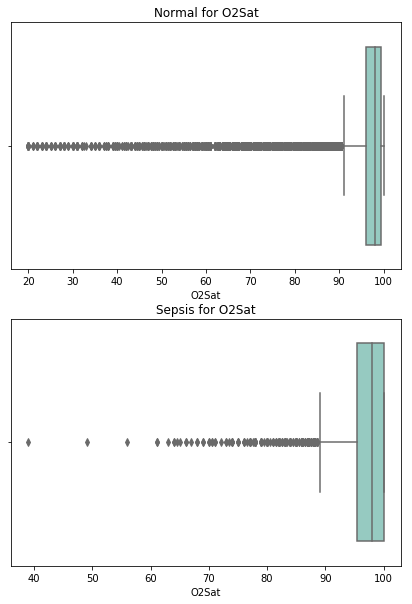

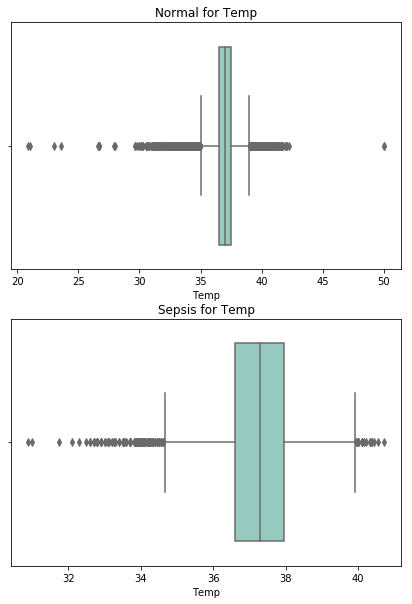

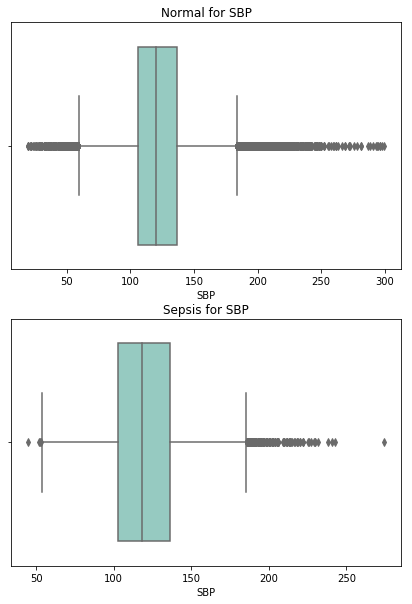

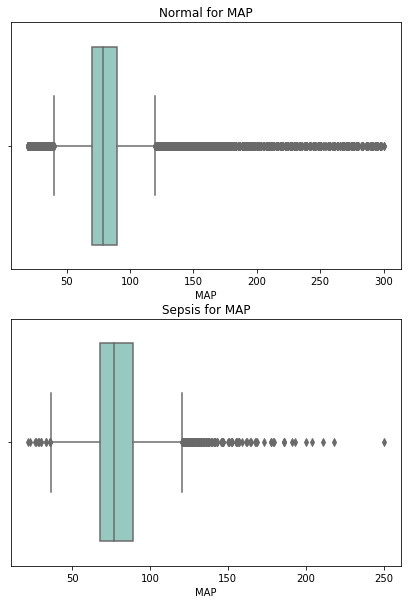

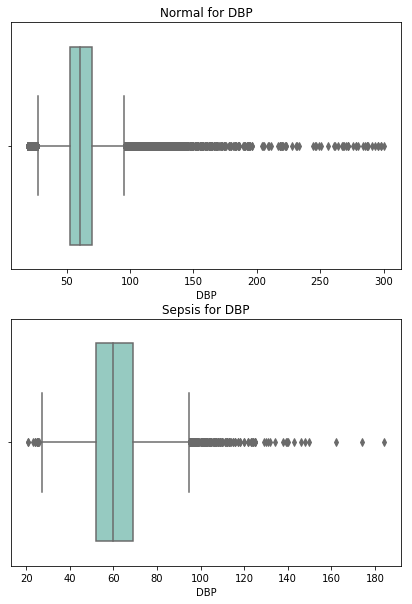

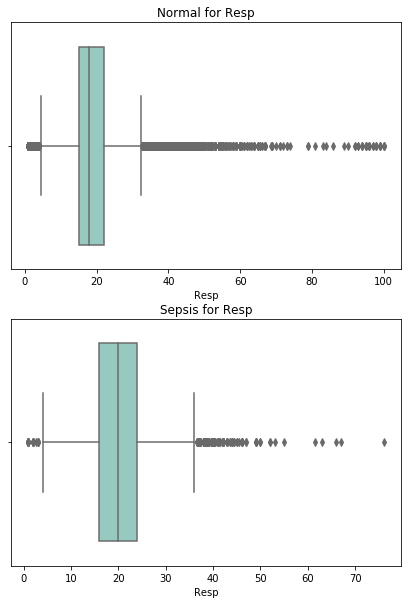

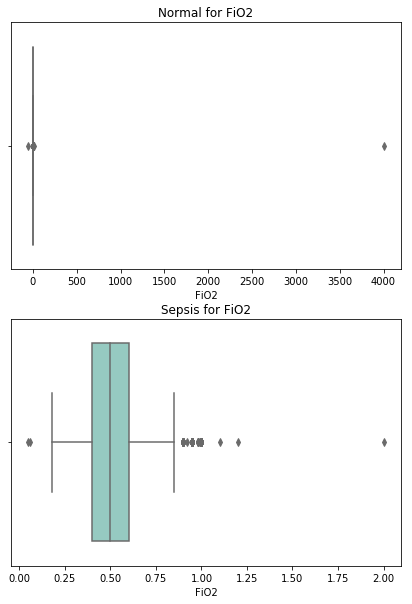

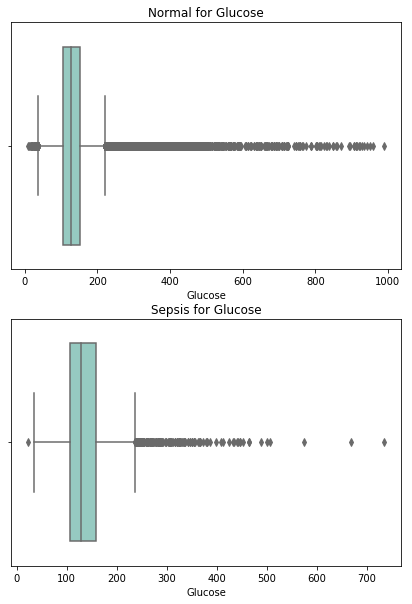

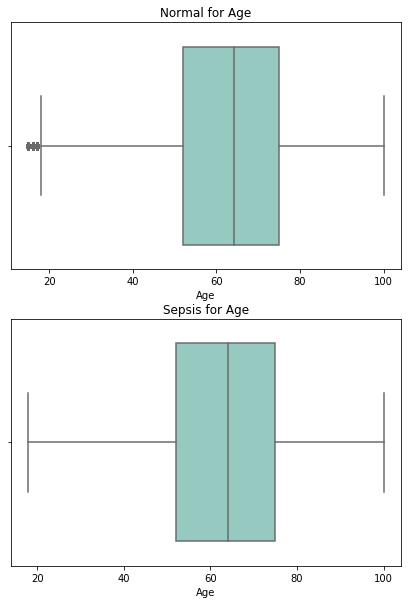

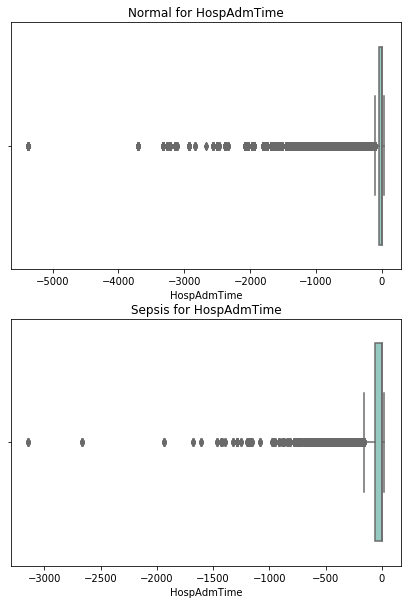

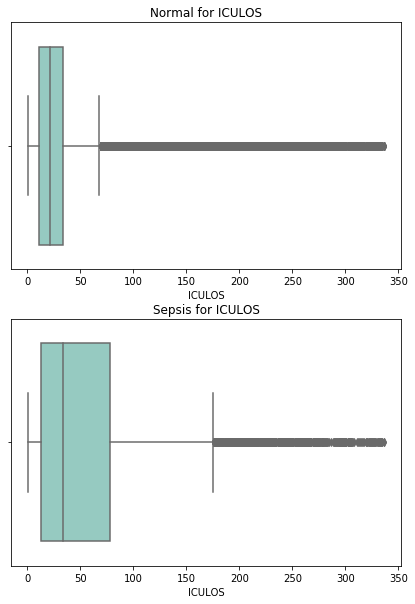

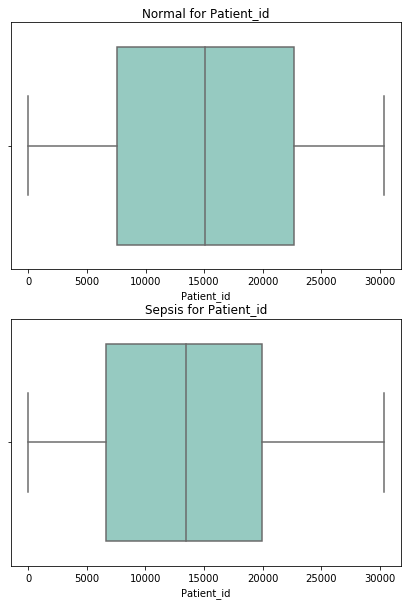

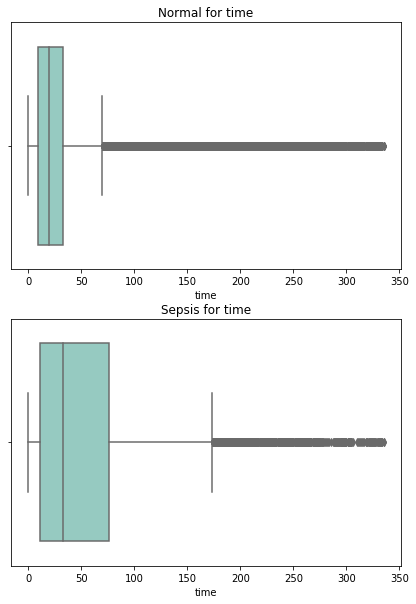

In [24]:
for i,var in enumerate(cont_vars):
    temp = filter_train[[var,'SepsisLabel']].dropna()
    temp1 = temp[temp['SepsisLabel']==0]
    temp2 = temp[temp['SepsisLabel']==1]
    fig, ax = plt.subplots(2, 1, figsize=(7, 10))

    sns.boxplot(temp1[var], ax=ax[0], palette='Set3')
    sns.boxplot(temp2[var], ax=ax[1], palette='Set3')
    ax[0].set_title("Normal for " + var)
    ax[1].set_title("Sepsis for " + var)

## Feature Engineering

In [25]:
features = cont_vars + cat_vars
features

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'FiO2',
 'Glucose',
 'Age',
 'HospAdmTime',
 'ICULOS',
 'Patient_id',
 'time',
 'Gender',
 'Unit1',
 'Unit2']

In [26]:
X_train = filter_train[features]
y_train = filter_train['SepsisLabel']

In [31]:
categorical = X_train.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [32]:
cont_scale_pipeline = make_pipeline(SimpleImputer(strategy = "median"), 
                                    StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = "constant", 
                                           fill_value = 999), 
                             OneHotEncoder(handle_unknown="ignore"))
preprocess_trans_scale = make_column_transformer((cont_scale_pipeline, 
                                                  ~categorical), 
                                                 (cat_pipeline, categorical))

In [33]:
rf_pipe_scale = make_pipeline(preprocess_trans_scale, RandomForestClassifier())
gb_pipe_scale = make_pipeline(preprocess_trans_scale, GradientBoostingClassifier())
dt_pipe_scale = make_pipeline(preprocess_trans_scale, DecisionTreeClassifier() )

In [34]:
scores_rf_pipe_scale = cross_validate(rf_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])

D:\Softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
scores_rf_pipe_scale

{'fit_time': array([24.8990097 , 26.90213251, 29.60276341]),
 'score_time': array([8.19113755, 9.06550241, 7.80183482]),
 'test_average_precision': array([0.44506824, 0.44389828, 0.42229268]),
 'train_average_precision': array([0.99904365, 0.99918291, 0.99905141]),
 'test_roc_auc': array([0.88312484, 0.88959615, 0.87375182]),
 'train_roc_auc': array([0.99998591, 0.99998764, 0.99998716]),
 'test_precision': array([0.91766883, 0.90064995, 0.92012448]),
 'train_precision': array([0.99961937, 1.        , 0.99992318]),
 'test_recall': array([0.13322589, 0.13027129, 0.11914036]),
 'train_recall': array([0.8818078 , 0.878853  , 0.87409347])}

In [37]:
scores_gb_pipe_scale = cross_validate(gb_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])

In [41]:
scores_gb_pipe_scale

{'fit_time': array([143.54611874, 168.07917333, 152.46878338]),
 'score_time': array([6.38830137, 4.79419994, 7.05024481]),
 'test_average_precision': array([0.12984242, 0.12277869, 0.12474604]),
 'train_average_precision': array([0.13970098, 0.14711923, 0.14158297]),
 'test_roc_auc': array([0.79570765, 0.79322992, 0.79604405]),
 'train_roc_auc': array([0.80193408, 0.80178964, 0.79732959]),
 'test_precision': array([0.82142857, 0.77419355, 0.86440678]),
 'train_precision': array([0.8951049 , 0.88590604, 0.92307692]),
 'test_recall': array([0.00617781, 0.00644641, 0.00685024]),
 'train_recall': array([0.0085958 , 0.00886441, 0.00886382])}

In [39]:
scores_dt_pipe_scale = cross_validate(dt_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])

In [42]:
scores_dt_pipe_scale

{'fit_time': array([15.85463953, 18.73469353, 20.15956235]),
 'score_time': array([3.55262184, 2.99599051, 1.89991426]),
 'test_average_precision': array([0.1864025 , 0.23013531, 0.20077625]),
 'train_average_precision': array([1., 1., 1.]),
 'test_roc_auc': array([0.71229436, 0.73711613, 0.72199378]),
 'train_roc_auc': array([1., 1., 1.]),
 'test_precision': array([0.40167777, 0.45364446, 0.41713725]),
 'train_precision': array([1., 1., 1.]),
 'test_recall': array([0.43728176, 0.48562987, 0.4564137 ]),
 'train_recall': array([1., 1., 1.])}

In [43]:
dt_df = pd.DataFrame(scores_dt_pipe_scale)
dt_df['model'] = 'DecisionTree'

gb_df = pd.DataFrame(scores_gb_pipe_scale)
gb_df['model'] = 'GradientBoosting'

rf_df = pd.DataFrame(scores_rf_pipe_scale)
rf_df['model'] = 'RandomForest'

results = pd.concat([dt_df, gb_df, rf_df])

In [44]:
results

,fit_time,score_time,test_average_precision,train_average_precision,test_roc_auc,train_roc_auc,test_precision,train_precision,test_recall,train_recall,model
0,15.854640,3.552622,0.186403,1.000000,0.712294,1.000000,0.401678,1.000000,0.437282,1.000000,DecisionTree
1,18.734694,2.995991,0.230135,1.000000,0.737116,1.000000,0.453644,1.000000,0.485630,1.000000,DecisionTree
2,20.159562,1.899914,0.200776,1.000000,0.721994,1.000000,0.417137,1.000000,0.456414,1.000000,DecisionTree
0,143.546119,6.388301,0.129842,0.139701,0.795708,0.801934,0.821429,0.895105,0.006178,0.008596,GradientBoosting
1,168.079173,4.794200,0.122779,0.147119,0.793230,0.801790,0.774194,0.885906,0.006446,0.008864,GradientBoosting
2,152.468783,7.050245,0.124746,0.141583,0.796044,0.797330,0.864407,0.923077,0.006850,0.008864,GradientBoosting
0,24.899010,8.191138,0.445068,0.999044,0.883125,0.999986,0.917669,0.999619,0.133226,0.881808,RandomForest
1,26.902133,9.065502,0.443898,0.999183,0.889596,0.999988,0.900650,1.000000,0.130271,0.878853,RandomForest
2,29.602763,7.801835,0.422293,0.999051,0.873752,0.999987,0.920124,0.999923,0.119140,0.874093,RandomForest
